In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('dataset with sentiment.csv')

In [13]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [14]:
#Find any nan values
nan = df.loc[pd.isna(df).any(1), :].index


In [15]:
#Remove nan rows
for x in nan:
    df = df.drop(index = x, axis = 1)

In [16]:
df.loc[pd.isna(df).any(1), :].index

Int64Index([], dtype='int64')

In [17]:
#df['compound'] = np.abs(df.compound)

In [53]:
len(nan)

25

In [19]:
df.to_csv('final dataset with all features.csv', index=False)

In [20]:
df = df.sample(frac = 1)

In [21]:
correlation = df.iloc[:,5:]

In [22]:
correlation['target variable'] = df.label

In [23]:
corr = correlation.corr()

In [24]:
corr

,word_count,modal_count,verb_count,adjective_count,adverb_count,proper_noun_count,noun_count,emotiveness,modifiers,compound,positive,negative,neutral,target variable
word_count,1.000000,0.102144,0.687446,0.452867,0.286583,0.545747,0.551014,0.052622,0.514209,-0.076624,0.007003,0.022318,-0.024809,0.628362
modal_count,0.102144,1.000000,0.151863,0.005269,0.076760,-0.016175,-0.046586,0.000720,0.039470,0.039326,0.006943,-0.060778,0.049440,0.010795
verb_count,0.687446,0.151863,1.000000,0.211018,0.236608,0.240314,0.180891,-0.109344,0.286609,-0.069522,0.010851,0.040983,-0.044136,0.462410
adjective_count,0.452867,0.005269,0.211018,1.000000,0.096910,0.056761,0.268114,0.625433,0.891041,-0.043370,0.067773,0.060957,-0.101560,0.304272
adverb_count,0.286583,0.076760,0.236608,0.096910,1.000000,0.070008,-0.011161,0.411418,0.538138,0.000583,0.011507,-0.012324,0.003004,0.255177
proper_noun_count,0.545747,-0.016175,0.240314,0.056761,0.070008,1.000000,0.011404,-0.007574,0.079997,0.005254,-0.009309,-0.059364,0.059473,0.393666
noun_count,0.551014,-0.046586,0.180891,0.268114,-0.011161,0.011404,1.000000,-0.215849,0.221961,-0.098831,0.020479,0.095856,-0.099842,0.268902
emotiveness,0.052622,0.000720,-0.109344,0.625433,0.411418,-0.007574,-0.215849,1.000000,0.717279,0.020514,0.049893,0.002268,-0.036714,0.120762
modifiers,0.514209,0.039470,0.286609,0.891041,0.538138,0.079997,0.221961,0.717279,1.000000,-0.036462,0.062641,0.046001,-0.084635,0.374049
compound,-0.076624,0.039326,-0.069522,-0.043370,0.000583,0.005254,-0.098831,0.020514,-0.036462,1.000000,0.673354,-0.798790,0.245230,-0.107434


<AxesSubplot:>

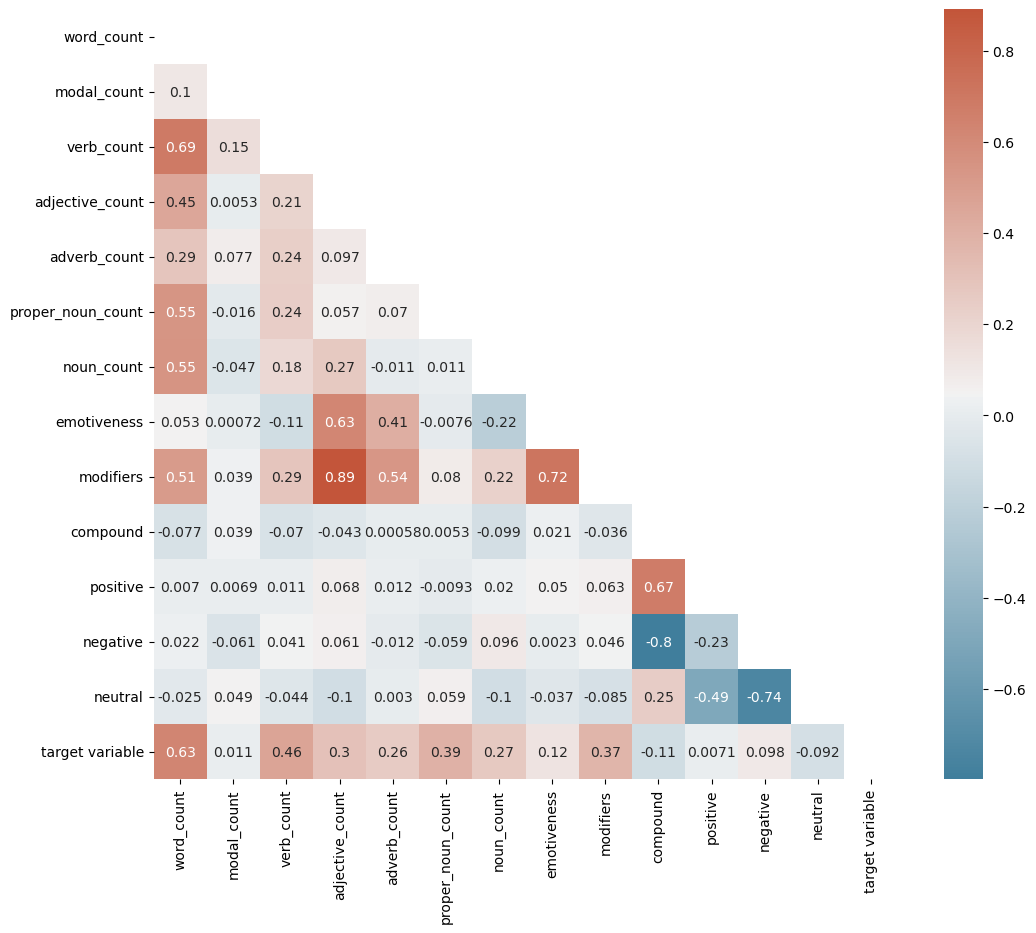

In [25]:
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True,mask = mask, cmap=cmap)

In [31]:
X = df.iloc[:,5:]
y = df.label

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = classifier.predict(X_test)


C:\Users\xrist\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      5305
           1       0.89      0.81      0.85      5914

    accuracy                           0.85     11219
   macro avg       0.85      0.85      0.85     11219
weighted avg       0.85      0.85      0.85     11219



In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
gnb = GaussianNB()

In [40]:
gnb.fit(X_train, y_train)

GaussianNB()

In [41]:
y_pred = gnb.predict(X_test)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      5305
           1       0.91      0.77      0.84      5914

    accuracy                           0.84     11219
   macro avg       0.85      0.84      0.84     11219
weighted avg       0.85      0.84      0.84     11219



In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

C:\Users\xrist\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [45]:
pip install tabulate


In [47]:
from tabulate import tabulate
print(tabulate(vif_data, headers=['feature', 'VIF'], tablefmt="grid", showindex="always"))

+----+-------------------+-----------+
|    | feature           |       VIF |
+====+===================+===========+
|  0 | word_count        |  72.4472  |
+----+-------------------+-----------+
|  1 | modal_count       |   1.18804 |
+----+-------------------+-----------+
|  2 | verb_count        |   9.85789 |
+----+-------------------+-----------+
|  3 | adjective_count   | inf       |
+----+-------------------+-----------+
|  4 | adverb_count      | inf       |
+----+-------------------+-----------+
|  5 | proper_noun_count |   9.66666 |
+----+-------------------+-----------+
|  6 | noun_count        |  15.6163  |
+----+-------------------+-----------+
|  7 | emotiveness       |   7.62702 |
+----+-------------------+-----------+
|  8 | modifiers         | inf       |
+----+-------------------+-----------+
|  9 | compound          |  10.6155  |
+----+-------------------+-----------+
| 10 | positive          |   5.84988 |
+----+-------------------+-----------+
| 11 | negative          

In [52]:
vif_data

,feature,VIF
0,word_count,72.447245
1,modal_count,1.188045
2,verb_count,9.857887
3,adjective_count,inf
4,adverb_count,inf
5,proper_noun_count,9.666655
6,noun_count,15.616274
7,emotiveness,7.627022
8,modifiers,inf
9,compound,10.615548


In [ ]:
sample = df['title'].iloc[:250]

In [ ]:
sample

In [ ]:
sample.to_csv('analyse.txt', sep='\t')  



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['token_data'])

In [ ]:
X

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
countVec = CountVectorizer(max_features= 5000, stop_words='english', min_df=.01, max_df=.90)

#%%
#use CountVectorizer.fit(self, raw_documents[, y] to learn vocabulary dictionary of all tokens in raw documents
#raw documents in this case will betweetsFrameWords["Text"] (processed text)
countVec.fit(df["title"])
#useful debug, get an idea of the item list you generated
list(countVec.vocabulary_.items())

In [ ]:
#%%
#convert to bag of words
#sparse matrix representation? (README: could use an edit/explanation)
countVec_count = countVec.transform(df["token_data"])

In [ ]:
#%%
#make array from number of occurrences
occ = np.asarray(countVec_count.sum(axis=0)).ravel().tolist()

In [ ]:
#make a new data frame with columns term and occurrences, meaning word and number of occurences
bowListFrame = pd.DataFrame({'term': countVec.get_feature_names_out(), 'occurrences': occ})
print(bowListFrame)

In [ ]:
#sort in order of number of word occurences, most->least. if you leave of ascending flag should default ASC
bowListFrame.sort_values(by='occurrences', ascending=False).head(60)

In [ ]:
#%%
#now, convert to a more useful ranking system, tf-idf weights
#TfidfTransformer: scale raw word counts to a weighted ranking using the
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
tweetTransformer = TfidfTransformer()

In [ ]:
#initial fit representation using transformer object
tweetWeights = tweetTransformer.fit_transform(countVec_count)

In [ ]:
#follow similar process to making new data frame with word occurrences, but with term weights
tweetWeightsFin = np.asarray(tweetWeights.mean(axis=0)).ravel().tolist()

In [ ]:
#now that we've done Tfid, make a dataframe with weights and names
tweetWeightFrame = pd.DataFrame({'term': countVec.get_feature_names_out(), 'weight': tweetWeightsFin})
print(tweetWeightFrame)
tweetWeightFrame.sort_values(by='weight', ascending=False).head(20)   